In [1]:
import sys, os
sys.path.append(os.path.abspath("../../"))

In [2]:
import numpy as np

In [3]:
from core_enrich_ia_elts_cluster_discrete import lib as core
from snii_enrich_ia_elts_discrete import lib as snii_discrete
from snii_enrich_ia_elts_cluster import lib as snii_continuous

In [4]:
core.detailed_enrichment_init()
snii_discrete.detailed_enrichment_init()
snii_discrete.init_rand()
snii_continuous.detailed_enrichment_init()

In [15]:
from collections import defaultdict
import numpy as np
from tabulation import Lifetimes
from tabulation import IMF
from scipy import integrate
from tqdm import tqdm_notebook as tqdm

import betterplotlib as bpl
bpl.presentation_style()

In [6]:
sn_ii_idxs = {"C": 0, "N": 1, "O":2, "Mg":3, "S":4, "Ca": 5, "Fe": 6,
              "Z_II": 7, "Z": 7, "total": 8, "E": 9, "N_SN": 10, "N_SN_left": 11}

# Check rates

In [7]:
dt = 1E4
times = np.arange(1E6, 50E6, dt)

In [8]:
lt = Lifetimes("Raiteri_96")

In [9]:
m_test = 1E8

In [10]:
snii_discrete.get_ejecta_sn_ii_py(0, 55, 7, m_test, 0.02)[0]

86498.29661538462

Have a range of metallicities, including some that are not in the grid.

In [11]:
zs = [0.004, 0.0075, 0.01, 0.015, 0.02]

In [12]:
turnoff_masses = {z: [lt.turnoff_mass(t, z) for t in tqdm(times)] for z in zs}

Text(0.5, 1.0, 'Discrete')

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


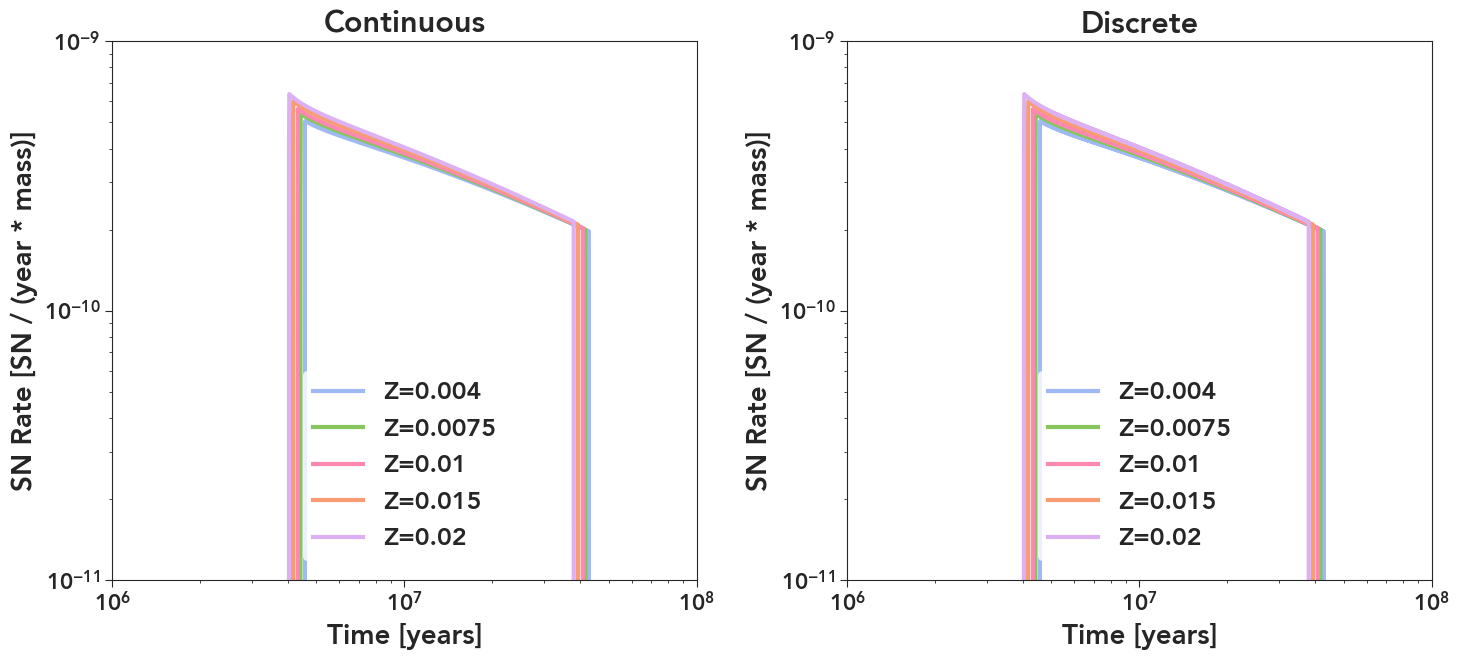

In [19]:
fig, axs = bpl.subplots(figsize=[15, 7], ncols=2)
for z in zs:
    ms = turnoff_masses[z]
    
    sn_rate_c = []
    sn_rate_d = []
    for idx in range(len(ms) - 1):
        m_now = ms[idx]
        m_next = ms[idx + 1]
        
        sn_rate_c.append(snii_continuous.get_ejecta_sn_ii_py(0, m_now, m_next, m_test, z)[sn_ii_idxs["N_SN"]] / (dt * m_test))
        sn_rate_d.append(snii_discrete.get_ejecta_sn_ii_py(0, m_now, m_next, m_test, z)[sn_ii_idxs["N_SN"]] / (dt * m_test))
    axs[0].plot(times[:-1], sn_rate_c, label="Z={}".format(z))
    axs[1].plot(times[:-1], sn_rate_d, label="Z={}".format(z))
for ax in axs:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.add_labels("Time [years]", "SN Rate [SN / (year * mass)]")
    ax.legend()
    ax.set_limits(1E6, 1E8, 1E-11, 1E-9)
axs[0].set_title("Continuous")
axs[1].set_title("Discrete")